In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
%matplotlib inline

In [2]:
from tensorflow import keras

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
input_shape=(28,28,1)


In [6]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [8]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")


In [9]:
x_train=x_train/255
x_test=x_test/255

In [11]:
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [16]:
model=keras.Sequential([
    keras.layers.Conv2D(28,kernel_size=(3,3),input_shape=input_shape),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')


In [28]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 0.0514 - val_accuracy: 0.9856
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.0540 - val_accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0567 - val_accuracy: 0.9862
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 0.0553 - val_accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0710 - val_accuracy: 0.9857


In [29]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("loss is=",test_loss)
print("test accuracy is=",test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0710 - accuracy: 0.9857
loss is= 0.07104078680276871
test accuracy is= 0.9857000112533569


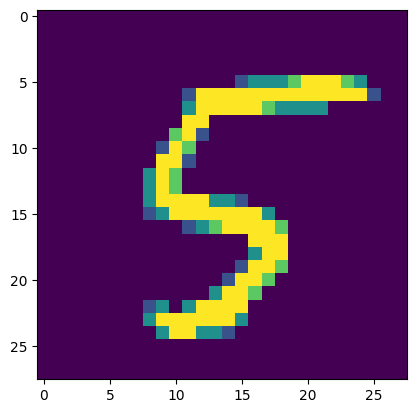

In [30]:
n=random.randint(0,9999)
image=x_test[n]
plt.imshow(image)

In [31]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predicted_model=model.predict([image])
print("number is %d"% np.argmax(predicted_model))

1/1 [==============================] - 0s 47ms/step
number is 5


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

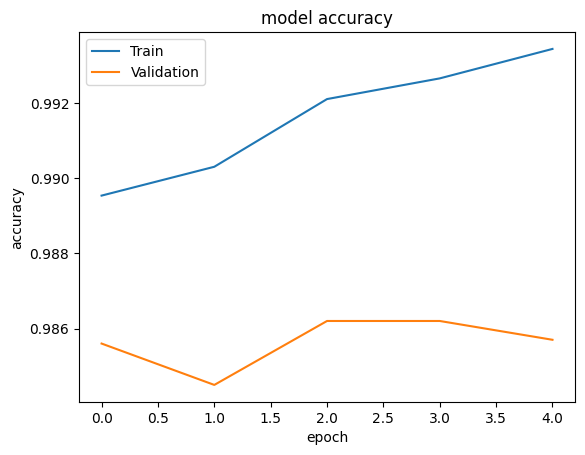

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()